In [ ]:
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq

openjdk-8-jdk-headless is already the newest version (8u382-ga-1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Preliminary Data Analysis:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


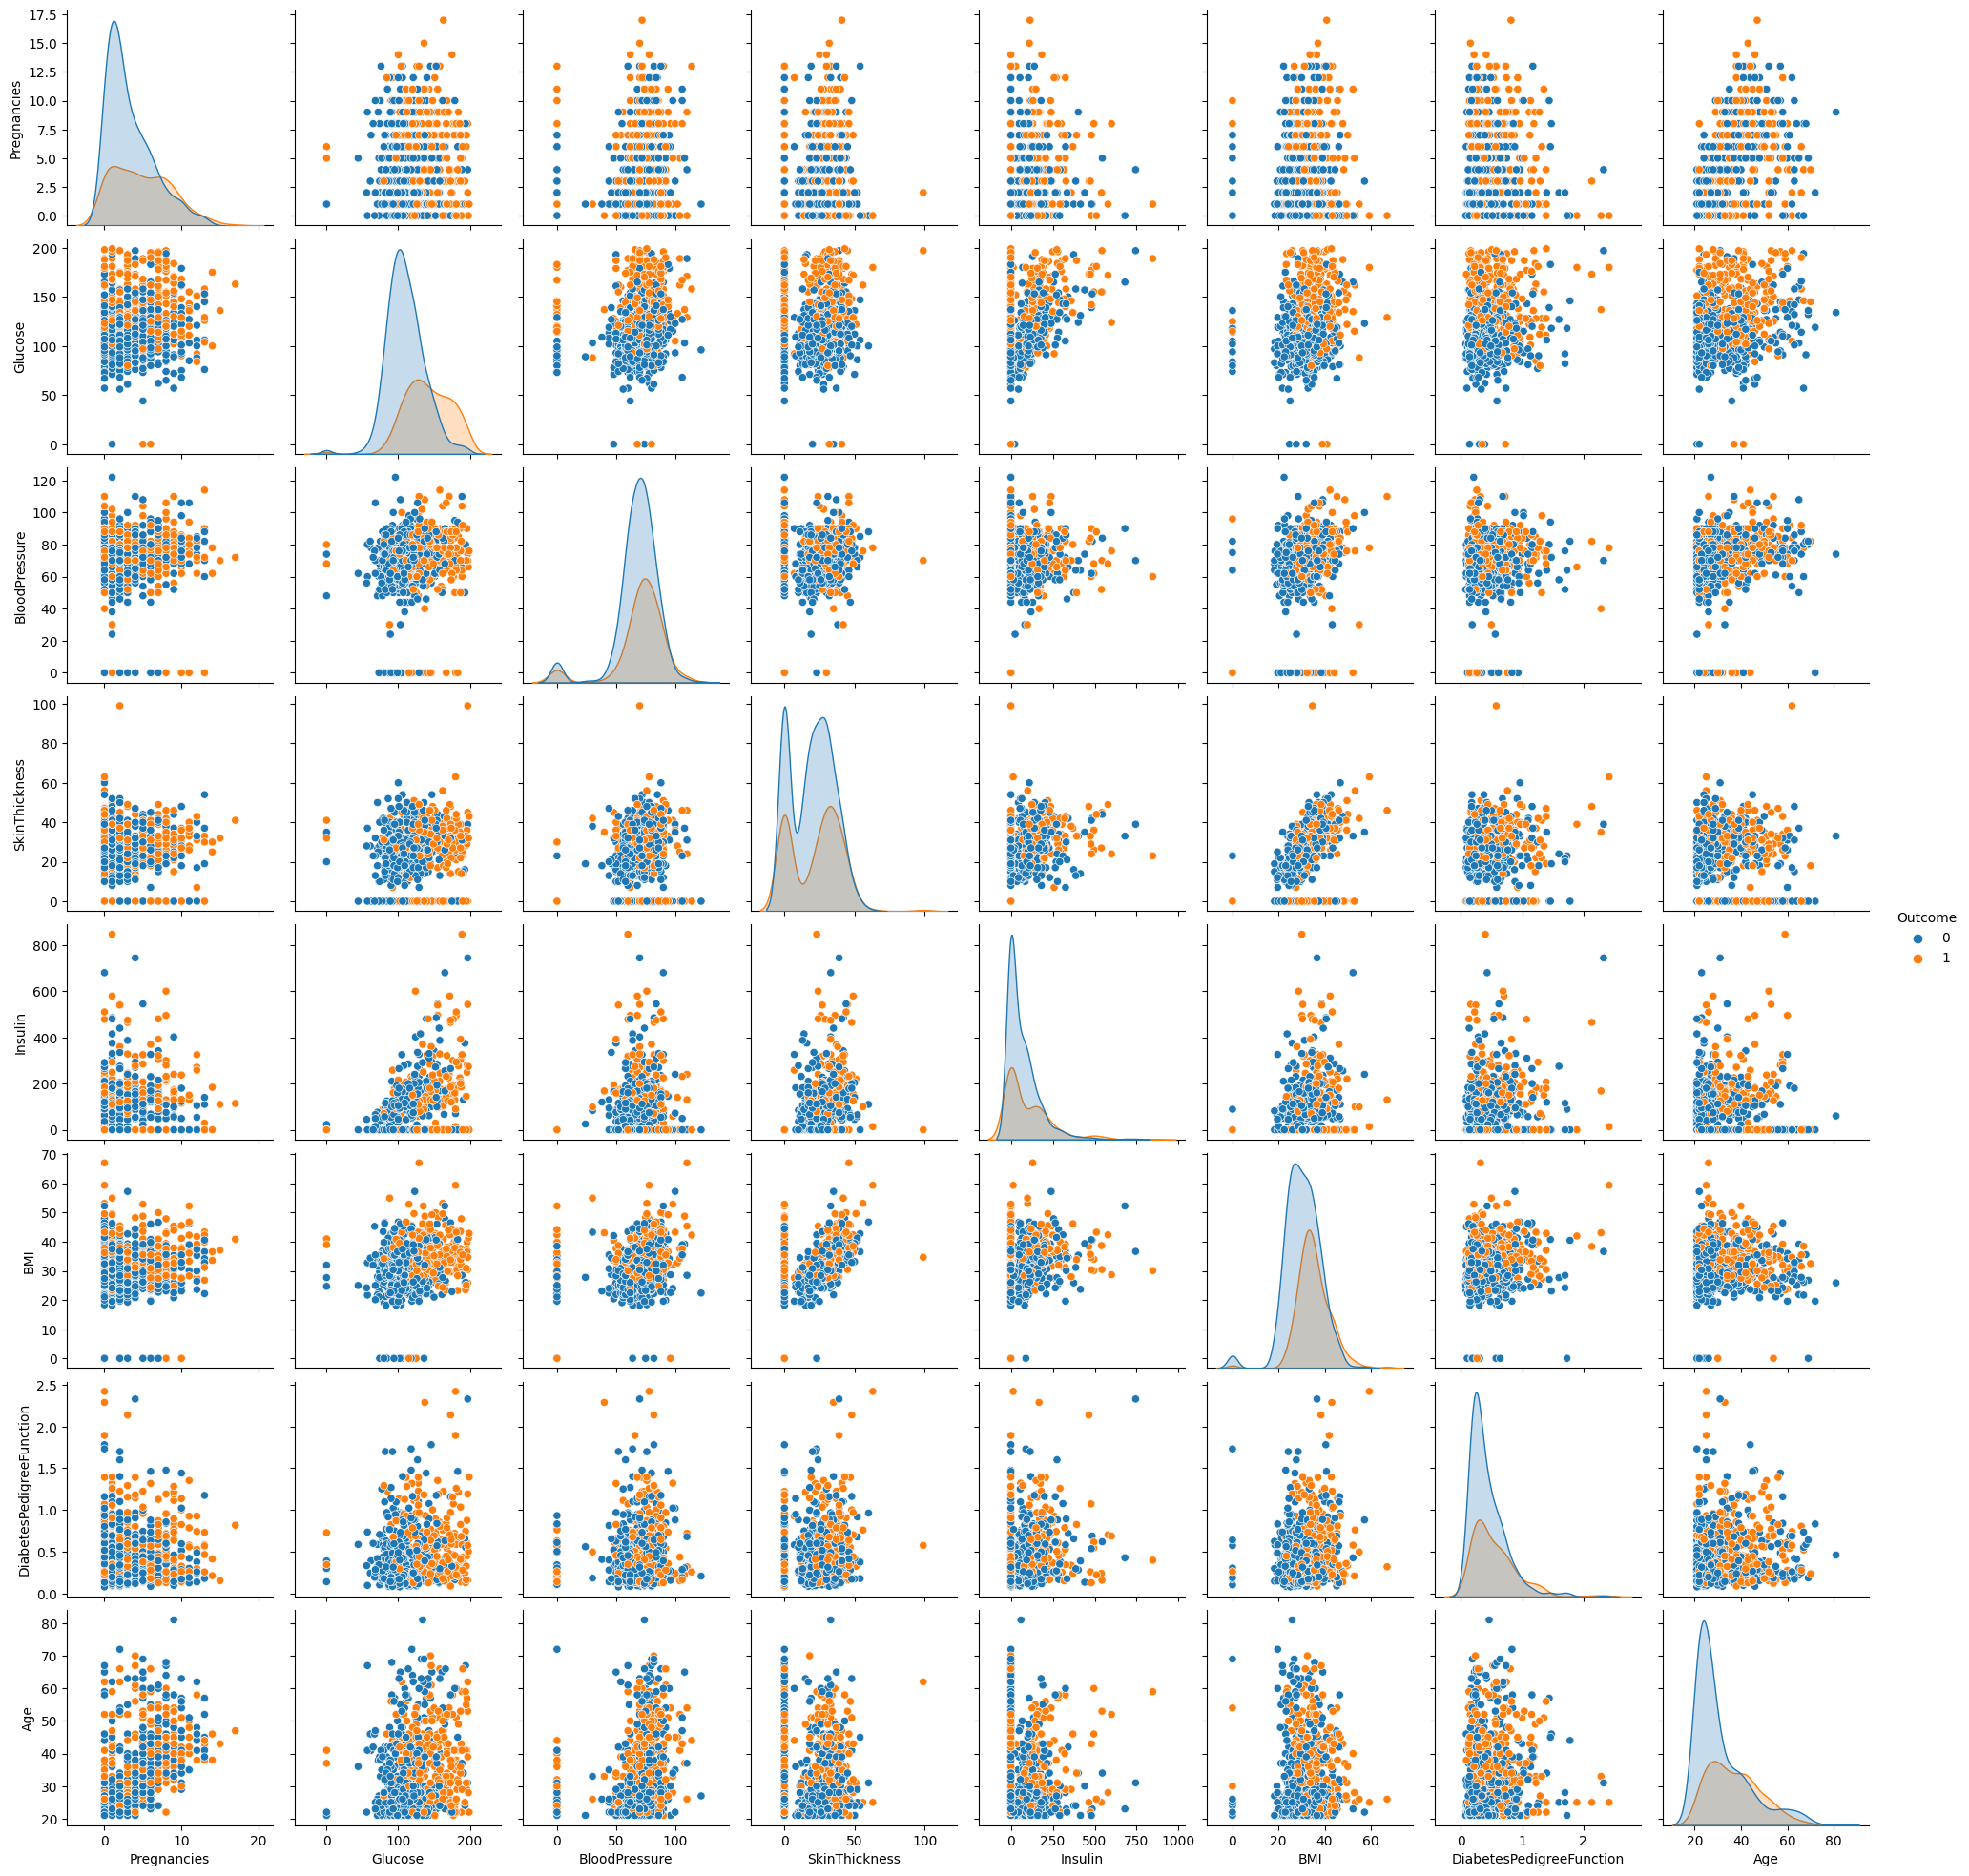

In [ ]:
# ID of the files on Google Drive
id = '1JHgN1C0szOYHpzjhmtLugBERjNDFV_nF'

# Download 'graph-full.txt'
diabetes_data_downloaded = drive.CreateFile({'id': id})
diabetes_data_downloaded.GetContentFile('diabetes.csv')

diabetes_data = pd.read_csv('diabetes.csv')

# Display some basic information about the dataset
print(diabetes_data.info())

# Visualize data distribution/variability
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='kde')
plt.show()

# Data Processing and Splitting:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Univariate Tree Method:

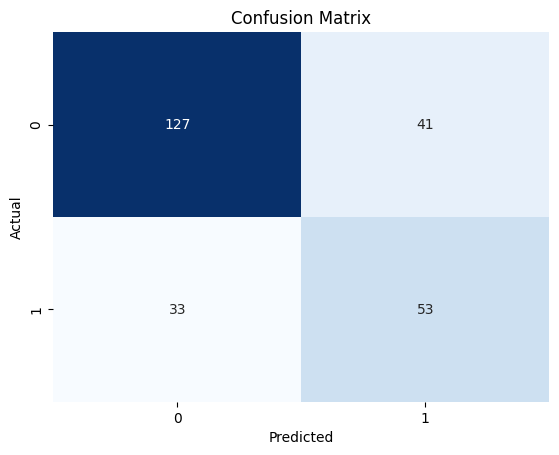

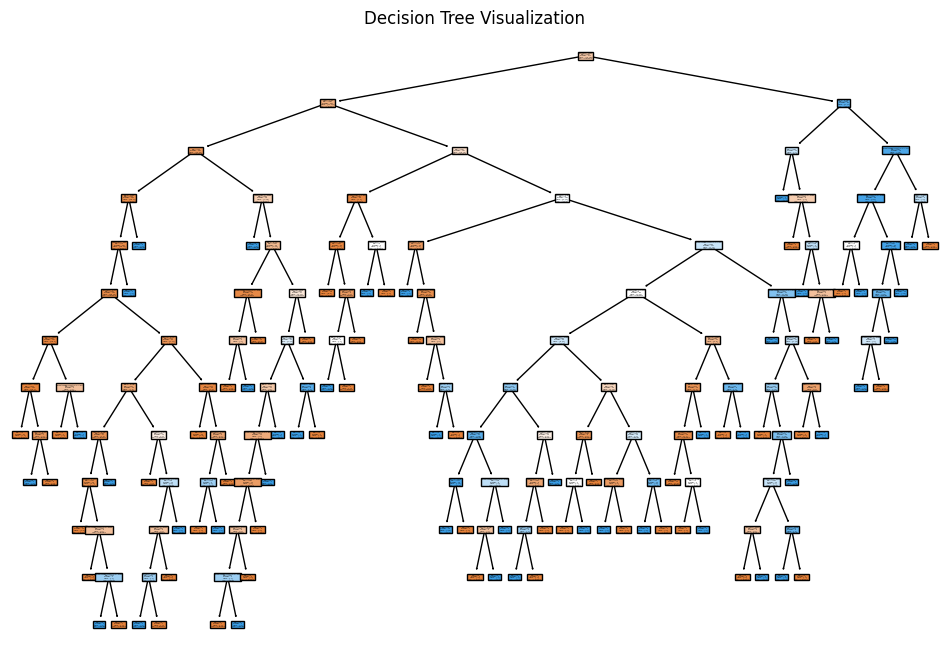

Accuracy: 70.87%
Confusion Matrix:
 [[127  41]
 [ 33  53]]
Number of nodes in the tree: 177
Tree depth: 12


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
tree_classifier.fit(X_train_scaled, y_train)

# Make predictions
tree_predictions = tree_classifier.predict(X_test_scaled)

# Visualizations
# 1. Confusion Matrix Visualization
cm = confusion_matrix(y_test, tree_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Decision Tree Visualization
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier, filled=True, feature_names=X_train.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree Visualization")

# Save the Decision Tree plot as a PNG file with higher resolution (e.g., dpi=300)
plt.savefig("univariate_decision_tree.png", dpi=1000)
plt.show()

# Comments on Results
# 1. Comment on Accuracy and Metrics
accuracy = accuracy_score(y_test, tree_predictions)
print(f"Accuracy: {accuracy:.2%}")

print("Confusion Matrix:\n", confusion_matrix(y_test, tree_predictions))

# 2. Comment on Decision Tree Complexity
print(f"Number of nodes in the tree: {tree_classifier.tree_.node_count}")
print(f"Tree depth: {tree_classifier.tree_.max_depth}")

# Ensemble Model (Random Forest):

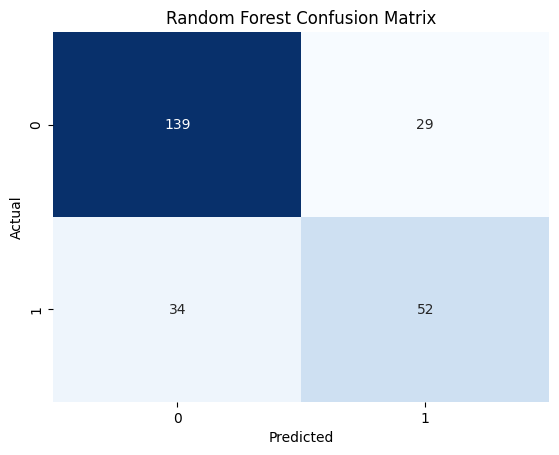

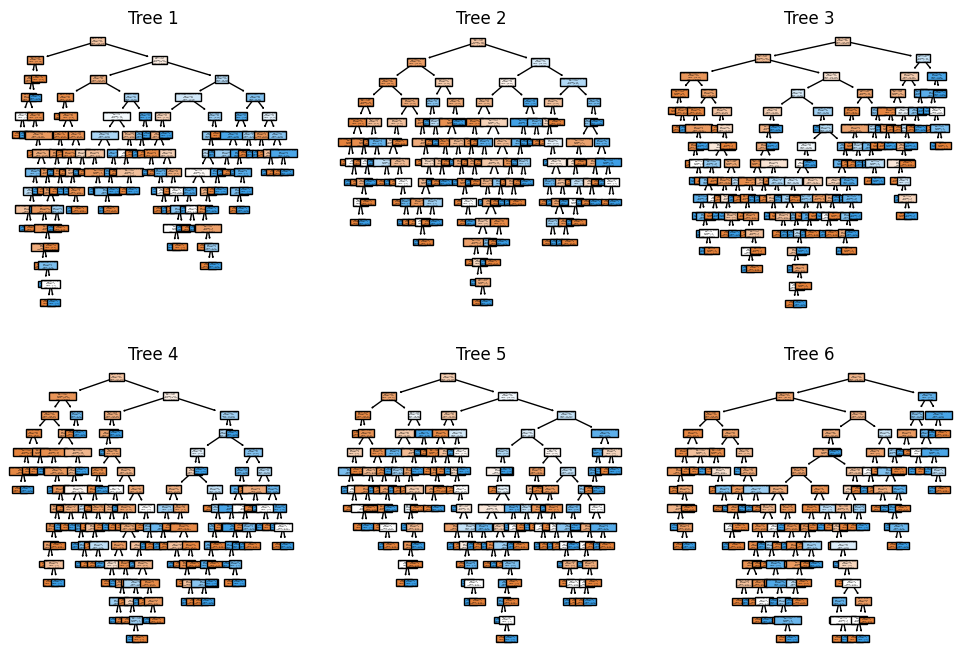

Random Forest Accuracy: 75.20%
Confusion Matrix:
 [[139  29]
 [ 34  52]]
Number of trees in the Random Forest: 100
Average number of nodes across trees: 173.82


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test_scaled)

# Visualizations
# 1. Confusion Matrix Visualization
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Decision Trees in the Random Forest
plt.figure(figsize=(12, 8))
num_trees_to_plot = min(len(rf_classifier.estimators_), 6)  # Limit to 6 subplots
rows, cols = 2, 3
for i in range(num_trees_to_plot):
    plt.subplot(rows, cols, i + 1)
    plot_tree(rf_classifier.estimators_[i], filled=True, feature_names=X_train.columns, class_names=["No Diabetes", "Diabetes"])
    plt.title(f"Tree {i + 1}")

    # Save each Decision Tree plot as a PNG file with higher resolution (e.g., dpi=300)
    plt.savefig(f"random_forest_tree_{i + 1}.png", dpi=1000)

plt.show()

# Comments on Results
# 1. Comment on Accuracy and Metrics
accuracy_rf = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")

print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

# 2. Comment on Random Forest Complexity
print(f"Number of trees in the Random Forest: {len(rf_classifier.estimators_)}")
print(f"Average number of nodes across trees: {np.mean([tree.tree_.node_count for tree in rf_classifier.estimators_]):.2f}")


# Visualization of Tree Splits:

In [ ]:
# Visualize the first six decision trees in the Random Forest
plt.figure(figsize=(12, 8))
for i in range(6):
    # Extract a single tree from the forest
    tree = rf_classifier.estimators_[i]

    # Export the tree as a DOT file
    dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

    # Visualize the tree
    graph = graphviz.Source(dot_data)
    graph.render(f"diabetes_tree_{i + 1}", format="png", cleanup=True)
    graph.view(f"diabetes_tree_{i + 1}")

<Figure size 1200x800 with 0 Axes>